In [1]:
#Basic libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns#Correlation matrix
from sklearn.model_selection import train_test_split#Test and Train dataset
#Metrics - kappa, f1_score, accuracy_score, confusion matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Logistic regression
from sklearn.linear_model import LogisticRegression
#Random forest
from sklearn.ensemble import RandomForestClassifier
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
#Knn
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Xgboost
from xgboost import XGBClassifier
#Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
dataset = pd.read_csv("bank.xls", delimiter= ",")
dataset = pd.DataFrame(dataset)
#Our dataset - 17 variables (1 dependent) and 11162 observations
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
#Informations about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
#Basic statistics for numerical variables
round(dataset.describe(),2)

,age,balance,day,duration,campaign,pdays,previous
count,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00
mean,41.23,1528.54,15.66,371.99,2.51,51.33,0.83
std,11.91,3225.41,8.42,347.13,2.72,108.76,2.29
min,18.00,-6847.00,1.00,2.00,1.00,-1.00,0.00
25%,32.00,122.00,8.00,138.00,1.00,-1.00,0.00
50%,39.00,550.00,15.00,255.00,2.00,-1.00,0.00
75%,49.00,1708.00,22.00,496.00,3.00,20.75,1.00
max,95.00,81204.00,31.00,3881.00,63.00,854.00,58.00


In [5]:
def bar_plot(variable):
    var = dataset[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue',])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

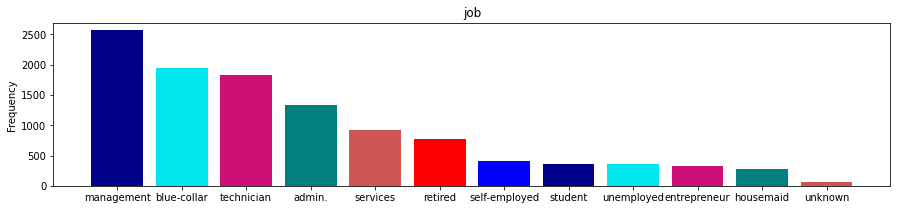

job: 
 management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


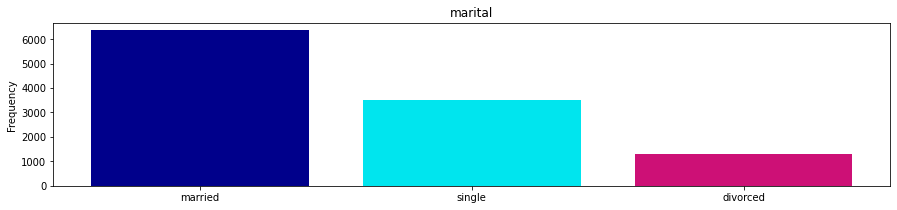

marital: 
 married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


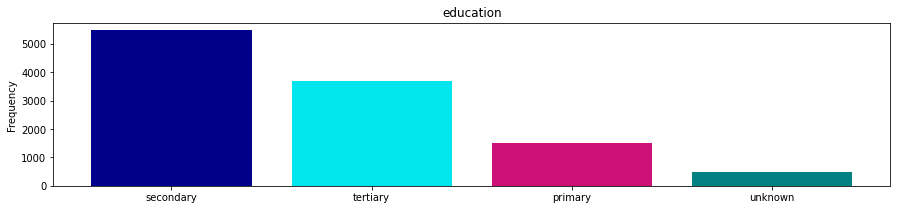

education: 
 secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


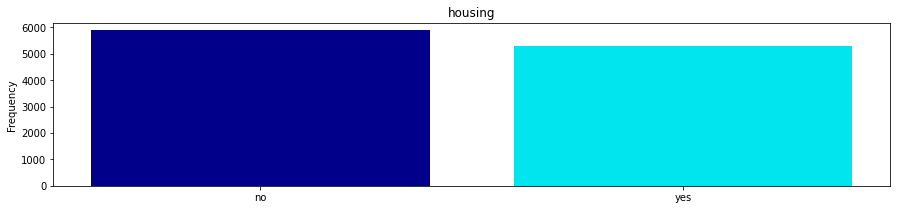

housing: 
 no     5881
yes    5281
Name: housing, dtype: int64


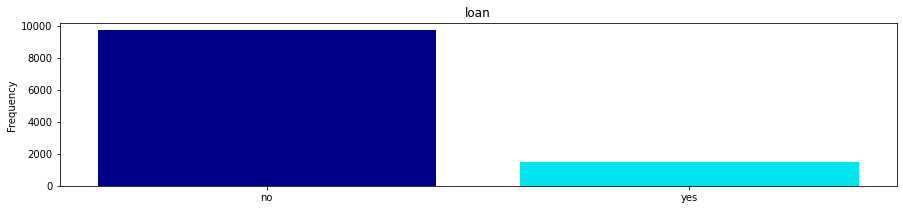

loan: 
 no     9702
yes    1460
Name: loan, dtype: int64


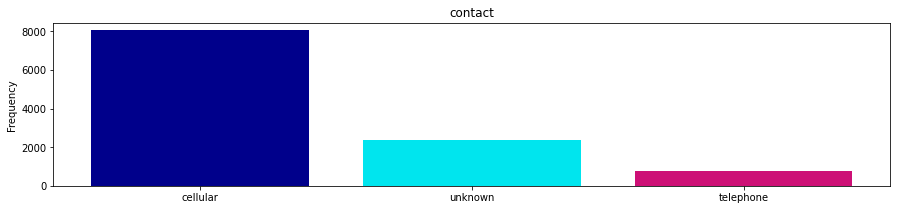

contact: 
 cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


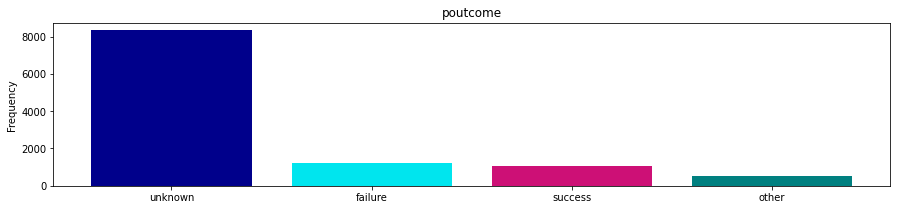

poutcome: 
 unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


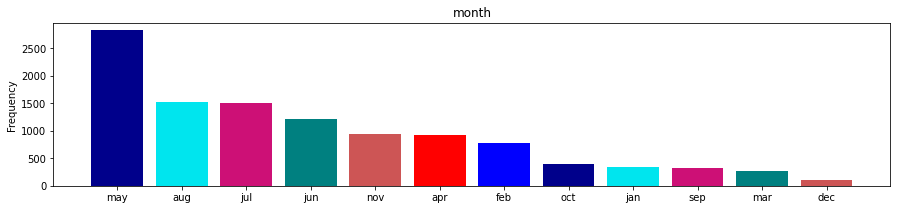

month: 
 may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


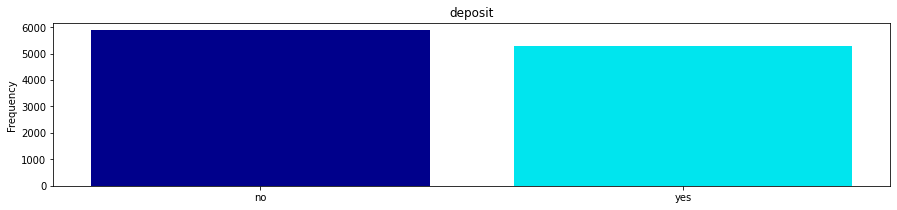

deposit: 
 no     5873
yes    5289
Name: deposit, dtype: int64


In [6]:
category_variables = ["job","marital","education", "housing", "loan","contact","poutcome","month","deposit"]
for c in category_variables:
    bar_plot(c)

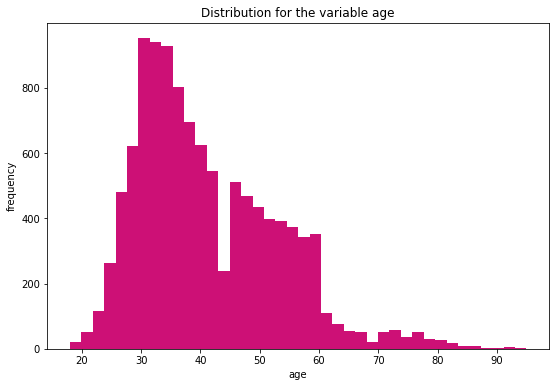

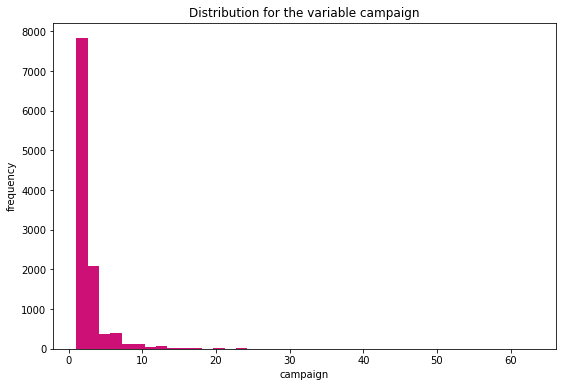

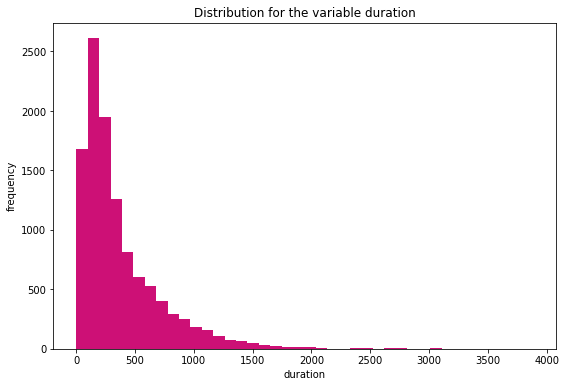

In [7]:
#Numerical Variable
def plot_hist(variable):
    plt.figure(figsize=(9,6))
    plt.hist(dataset[variable], bins=40,color='#cd1076')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("Distribution for the variable {}".format(variable))
    plt.show()
numericVar = ["age","campaign","duration"]
for n in numericVar:
    plot_hist(n)

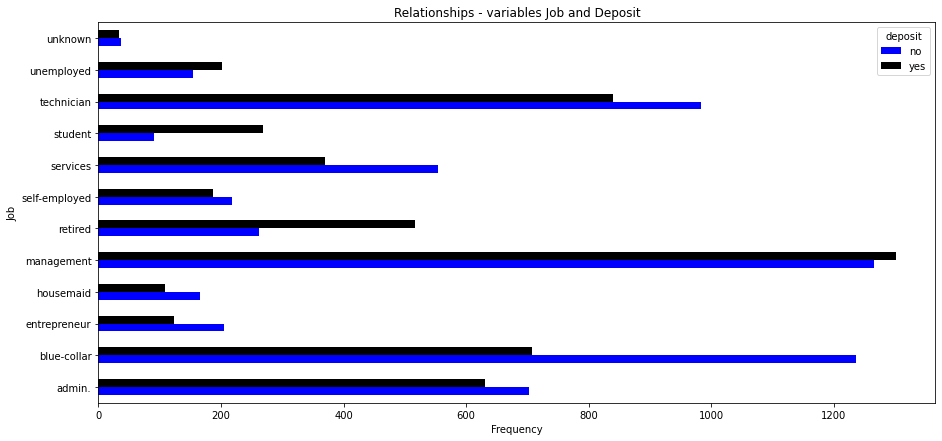

In [8]:
#Visualization connecting variable Job and dependent variable Deposit
pd.crosstab(dataset.job,dataset.deposit).plot(kind="barh",figsize=(15,7),color=['#0000ff','#000000'])
plt.title('Relationships - variables Job and Deposit')
plt.xlabel('Frequency')
plt.ylabel('Job')
plt.show()

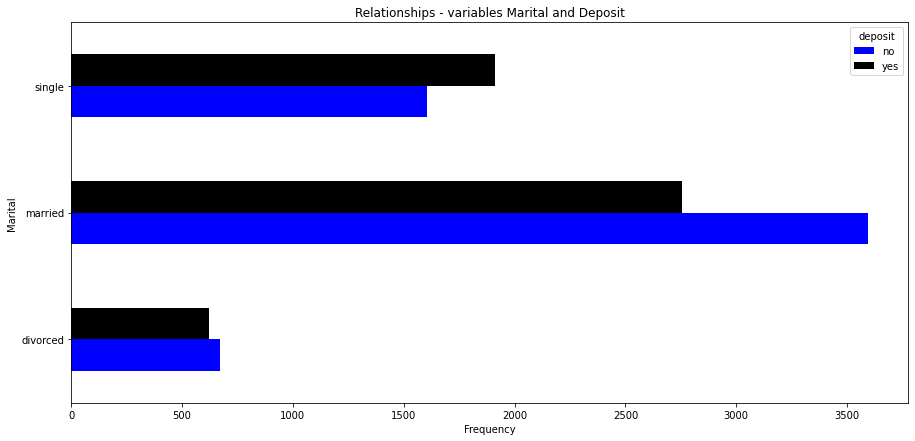

In [9]:
pd.crosstab(dataset.marital,dataset.deposit).plot(kind="barh",figsize=(15,7),color=['#0000ff','#000000'])
plt.title('Relationships - variables Marital and Deposit')
plt.xlabel('Frequency')
plt.ylabel('Marital')
plt.show()

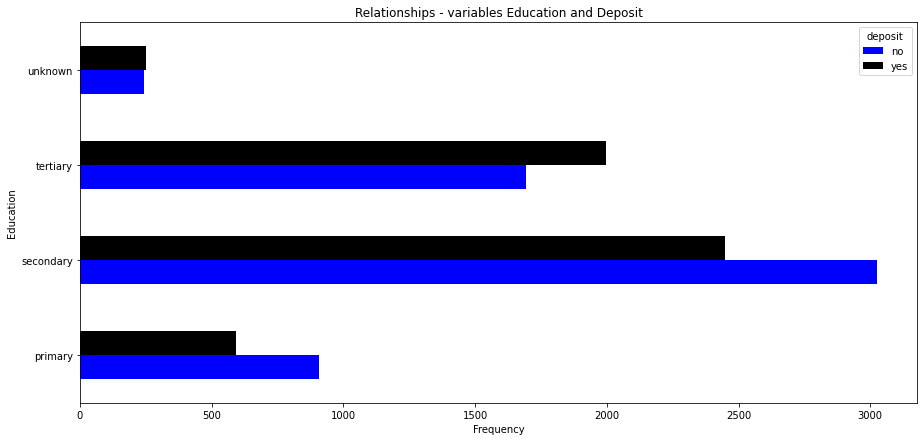

In [10]:
pd.crosstab(dataset.education,dataset.deposit).plot(kind="barh",figsize=(15,7),color=['#0000ff','#000000'])
plt.title('Relationships - variables Education and Deposit')
plt.xlabel('Frequency')
plt.ylabel('Education')
plt.show()

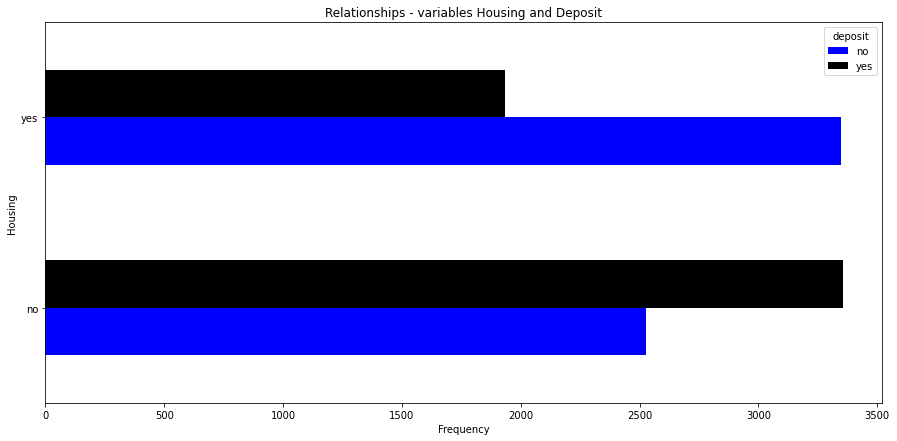

In [11]:
pd.crosstab(dataset.housing,dataset.deposit).plot(kind="barh",figsize=(15,7),color=['#0000ff','#000000'])
plt.title('Relationships - variables Housing and Deposit')
plt.xlabel('Frequency')
plt.ylabel('Housing')
plt.show()

In [12]:
#Missing values - we do not have missing values
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<AxesSubplot:>

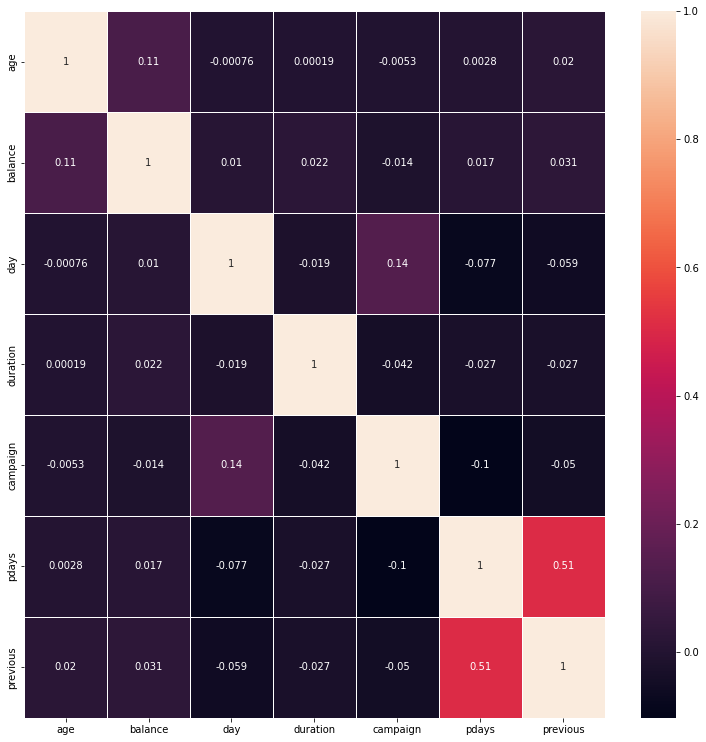

In [13]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, ax=ax)
#We do not have big correlation in our dataset
#We will not have a problem with redundancy of variables

In [14]:
#Encoding
cleanup_nums = {"marital":{"married": 0, "single": 1, "divorced":2},
                "job":{"management": 0, "blue-collar": 1, "technician":2,"admin.": 3, "services": 4, "retired":5,
                       "self-employed": 6, "student": 7, "unemployed":8,"entrepreneur": 9, "housemaid": 10, "unknown":11},
                "education":{"unknown": 0, "primary": 1, "tertiary":2,"secondary":3},
                "default":{"no": 0, "yes":1},
                "housing":{"no": 0, "yes":1},
                "loan":{"no": 0, "yes":1},
                "contact":{"unknown": 0, "telephone":1, "cellular":2},
                "month":{"jan": 0, "feb":1, "mar":2,"apr": 3, "may":4, "jun":5,"jul":6,"aug":7,"sep":8,
                         "oct":9,"nov":9,"dec":10},
                "poutcome":{"unknown": 0, "failure":1,"success": 2, "other":3},
                "deposit":{"no": 0, "yes":1}}
dataset = dataset.replace(cleanup_nums)
X = dataset[dataset.columns[1:16]]
Y = dataset[dataset.columns[16]]
dataset.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [15]:
#80% - observations in training dataset
#20% - observations in testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

accuracies = {}
kappaScores= {}

In [16]:
#Logistic regression
lr = LogisticRegression(random_state=101, multi_class='ovr', solver='liblinear', class_weight='balanced', C=0.2)
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

print(classification_report(y_test,prediction))
acc = round(accuracy_score(y_test,prediction)*100,2)
print("Logistic Regression accuracy:",acc)
accuracies['Logistic Regression'] = acc

cohen_kappa = round(cohen_kappa_score(y_test, prediction)*100,2)
print('Cohen Kappa score:',cohen_kappa)
kappaScores['Logistic Regression'] = cohen_kappa

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1176
           1       0.79      0.78      0.78      1057

    accuracy                           0.80      2233
   macro avg       0.80      0.79      0.80      2233
weighted avg       0.80      0.80      0.80      2233

Logistic Regression accuracy: 79.58
Cohen Kappa score: 59.01


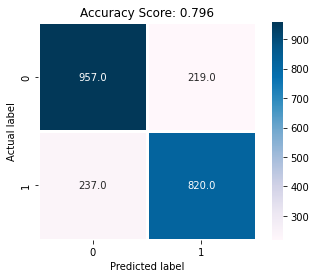

In [17]:
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score),size=12)
plt.show()

In [18]:
#Random forest
clf = RandomForestClassifier(n_estimators=100, max_depth=12,random_state=50)

clf.fit(X_train,y_train)

prediction = clf.predict(X_test)

acc = round(accuracy_score(y_test,prediction)*100,2)
print("Random Forest accuracy:",acc)
accuracies['Random Forest']=acc

cohen_kappa = round(cohen_kappa_score(y_test, prediction)*100,2)
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Random Forest']=cohen_kappa

Random Forest accuracy: 84.51
Cohen Kappa score:  68.99


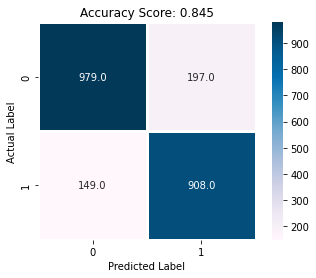

In [19]:
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Accuracy Score: {0}'.format(score),size=12)
plt.show()

In [20]:
#Naive Bayes
nb=GaussianNB()
nb.fit(X_train,y_train)
naiveb=nb.predict(X_test)
prediction= nb.predict(X_test)

acc = round(accuracy_score(y_test,prediction)*100,2)
print("Naive Bayes accuracy:",acc)
accuracies['Naive Bayes']=acc

cohen_kappa = round(cohen_kappa_score(y_test, prediction)*100,2)
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Naive Bayes']=cohen_kappa

Naive Bayes accuracy: 73.31
Cohen Kappa score:  46.39


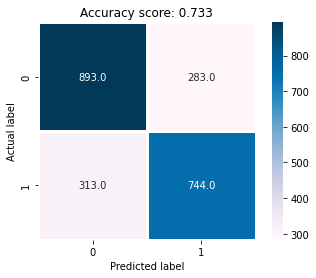

In [21]:
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0}'.format(score),size=12)
plt.show()

In [22]:
#Knn
knn= KNeighborsClassifier(n_neighbors = 4,algorithm='ball_tree')
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)
acc = round(accuracy_score(y_test,prediction)*100,2)
print("Knn accuracy:",acc)
accuracies['KNN']=acc

cohen_kappa = round(cohen_kappa_score(y_test, prediction)*100,2)
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['KNN']=cohen_kappa

Knn accuracy: 72.68
Cohen Kappa score:  44.58


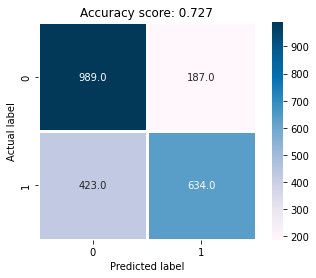

In [23]:
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0}'.format(score),size=12)
plt.show()

In [24]:
#Decision Tree
dtree= DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=100,min_samples_leaf=10)
dtree.fit(X_train, y_train)
prediction=dtree.predict(X_test)

acc = round(accuracy_score(y_test,prediction)*100,2)
print("Decision Tree accuracy:",acc)
accuracies['Decision Tree']=acc

cohen_kappa = round(cohen_kappa_score(y_test, prediction)*100,2)
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Decision Tree']=cohen_kappa

Decision Tree accuracy: 82.76
Cohen Kappa score:  65.35


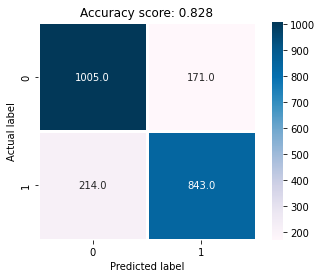

In [25]:
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0}'.format(score),size=12)
plt.show()

In [26]:
#Xgboost Classifier
xgb =XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.78,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)
prediction = xgb.predict(X_test)

[23:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
acc = round(accuracy_score(y_test, prediction)*100,2)
print("Xgboost Classifier accuracy:",acc)
accuracies['Xgboost Classifier']=acc

cohen_kappa = round(cohen_kappa_score(y_test, prediction)*100,2)
print('Cohen Kappa score:',cohen_kappa)
kappaScores['Xgboost Classifier']=cohen_kappa

Xgboost Classifier accuracy: 86.39
Cohen Kappa score: 72.74


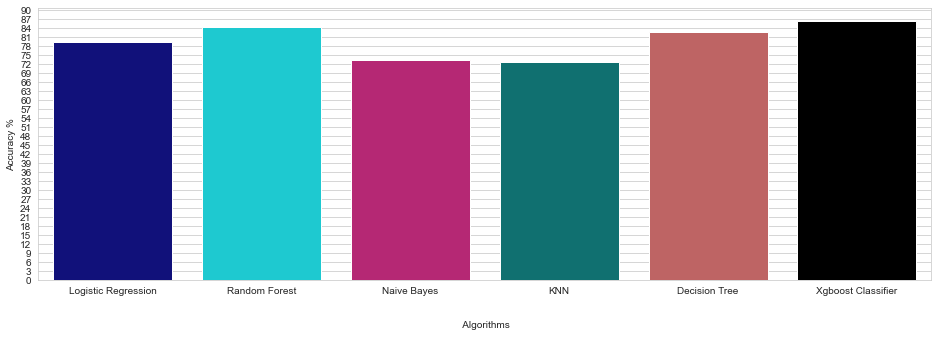

In [28]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,3))
plt.ylabel("Accuracy %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

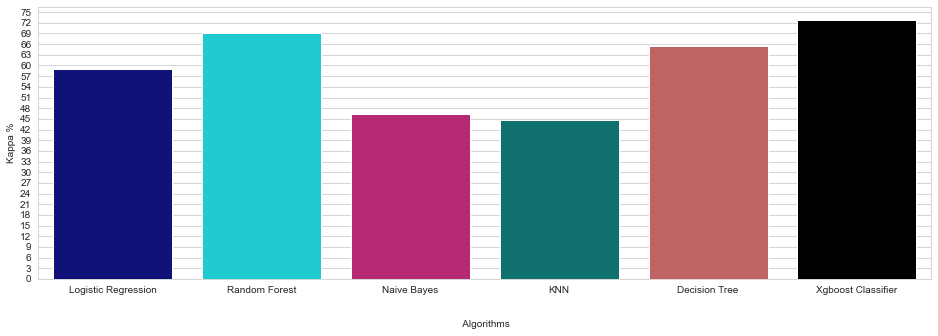

In [29]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,3))
plt.ylabel("Kappa %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(kappaScores.keys()), y=list(kappaScores.values()), palette=colors)
plt.show()